## <center>The Sparks Foundation</center>
### <center>TASK #2 - Prediction using Unsupervised ML</center>
### <center>Domain : Data Science and Business Analytics</center>
### <center>Author : Akshay Pandurang Paunikar</center>

##### Objective:
    From the given iris dataset, predict the optimum number of clusters and represent it visually

In [64]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [65]:
# set the working directory
import io
%cd "E:\TSF-INTERN\TSF-INTERN Tasks\Task#2"

E:\TSF-INTERN\TSF-INTERN Tasks\Task#2


In [66]:
# Read Iris.csv file into dataframe
iris = pd.read_csv('Iris.csv')

In [67]:
# check first 5 records from Iris data
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [68]:
# Get the dimension of the dataframe i.e. rows and columns
iris.shape

(150, 6)

There are 150 rows and 6 columns in iris dataframe.

In [69]:
# datatypes of columns in the dataframe
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [70]:
# Descriptive statistics
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [71]:
# Concise summary of a DataFrame.
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [72]:
# Check for null/missing values
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null/missing values in our data

#### Count of each type of Species in data

In [73]:
# Get the count of each type of species in the iris dataframe
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

So there are three types Setosa, Versicolor, Verginica and each has 50 counts.

Also from above we can conclude that our data is a balanced data.

In [74]:
# selecting only those features/columns which are required for our analysis
X = iris.iloc[:,1:5]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### K-means Clustering

First we will find the optimum value for our clusters using Elbow Method.
<br>
<br>
The Elbow method uses the WCSS concept to draw the plot by plotting WCSS values on the Y-axis and the number of clusters on the X-axis. So we are going to calculate the value for WCSS for different k values ranging from 1 to 15.

In [75]:
wcss=[]
k=range(1,15)
for i in k:
    kmeansmodel=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=15,random_state=42)
    kmeansmodel.fit(X)
    wcss.append(kmeansmodel.inertia_)

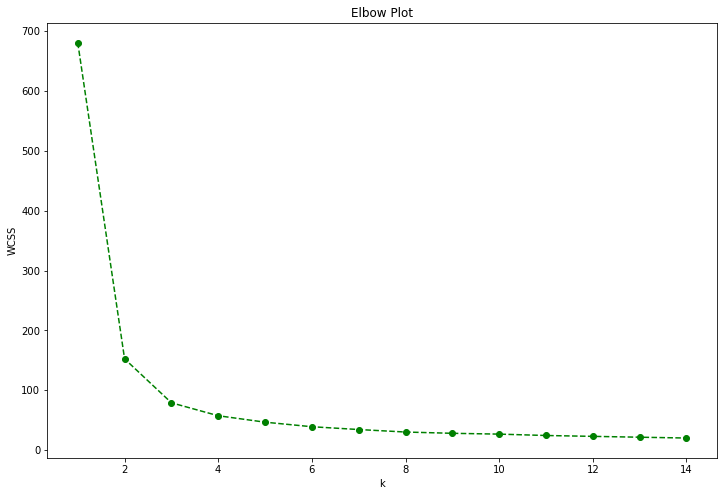

In [76]:
# The Elbow Plot
plt.figure(figsize=(12,8))
plt.plot(k,wcss,color='green', marker='o', linestyle='dashed')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.show()

From above Elbow plot we can say the optimum number of clusters should be 3.

#### Training the K-means algorithm on the dataset

In [77]:
# initialize the K-Means
clust_final = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=15,random_state=42)

In [78]:
# predict on the data
clustfinal = clust_final.fit_predict(X)

In [79]:
clust_final.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

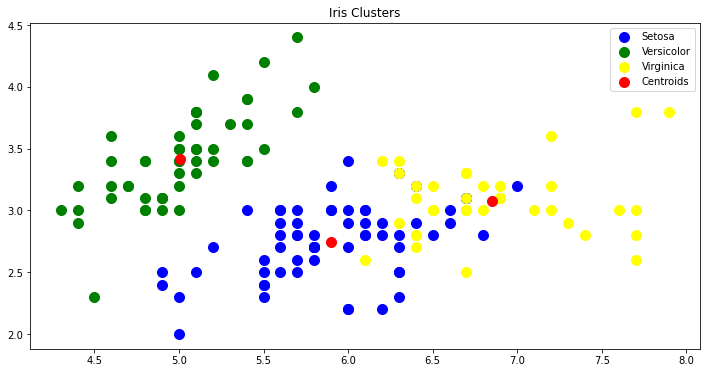

In [80]:
# Visualizing the Clusters
plt.figure(figsize=(12,6))
plt.scatter(X.iloc[clustfinal==0,0],X.iloc[clustfinal==0,1],s=100,c='blue',label='Setosa')
plt.scatter(X.iloc[clustfinal==1,0],X.iloc[clustfinal==1,1],s=100,c='green',label='Versicolor')
plt.scatter(X.iloc[clustfinal==2,0],X.iloc[clustfinal==2,1],s=100,c='yellow',label='Virginica')
# Plotting the centroids of the clusters
plt.scatter(clust_final.cluster_centers_[:, 0], clust_final.cluster_centers_[:,1],s = 100, c = 'red', label = 'Centroids')
plt.title('Iris Clusters')
plt.legend()
plt.show()

#### Silhouette Coefficient or silhouette score:
It is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
<br>
1: Means clusters are well apart from each other and clearly distinguished.
<br>
0: Means clusters are indifferent, or we can say that the clusters are overlapping.
<br>
-1: Means clusters are assigned in the wrong way.

In [81]:
X['Clusters'] = clustfinal

In [82]:
X['Clusters'].value_counts()

0    62
1    50
2    38
Name: Clusters, dtype: int64

In [83]:
silhouette_score(X,clust_final.labels_)

0.684936462996038

#### DBSCAN

In [84]:
# drop the 'Clusters' which were predictions of K-means
X = X.drop('Clusters',axis=1)

First we will find the optimum value of epsilon for DBSCAN clustering

In [85]:
# Calculate the average distance between each point in the data set and its 8 nearest neighbors
neighbors = NearestNeighbors(n_neighbors=8)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

In [86]:
# Sort distance values by ascending value and plot
distances = np.sort(distances, axis=0)
distances = distances[:,1]

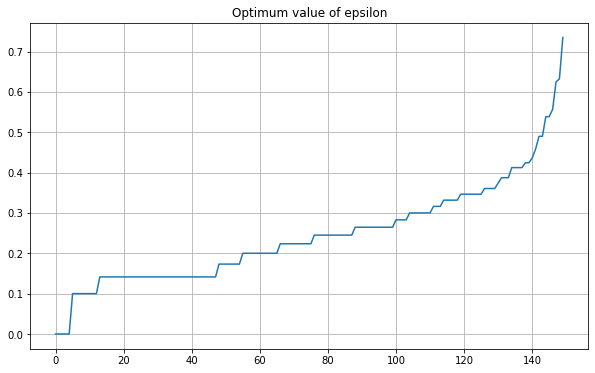

In [87]:
#plot the distance
plt.figure(figsize=(10,6))
plt.plot(distances)
plt.title('Optimum value of epsilon')
plt.grid()
plt.show()

The ideal value for epsilon will be equal to the distance value at the “crook of the elbow”, or the point of maximum curvature. 

In [88]:
# initialize DBSCAN using epsilon = 0.45
dbs = DBSCAN(eps=0.45,min_samples=8)

In [89]:
# fit and predict on the data
db_scan = dbs.fit_predict(X)

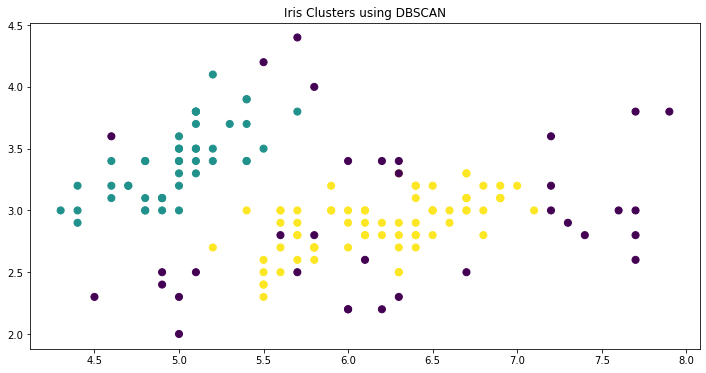

In [90]:
# Visualizing the Clusters
plt.figure(figsize=(12,6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=db_scan, s=50, cmap='viridis')
plt.title('Iris Clusters using DBSCAN')
plt.show()

In [91]:
X['Clusters'] = db_scan

In [92]:
X.Clusters.value_counts()

 1    71
 0    45
-1    34
Name: Clusters, dtype: int64

In [93]:
silhouette_score(X,db_scan)

0.5396863658467854

### Summary:
    1. We used clustering techniques like K-means and DBSCAN where K-Means with clusters = 3 gave good result with a 
    Silhoutte Score of 0.6849.
    2. The DBSCAN technique could only create 2 clusters and it classified other points as outliers.
    3. In the dataset we were already given target values so basically we could have used classification algorithms to solve            this problem also.